# Исследование статистики чемпионата мира по автогонкам класса Формулы-1 с 1950 по 2017 год

In [1]:
from pandas import Series, DataFrame, read_csv
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt, style
style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Краткое описание датасета, который используется в исследовании

### Список всех сезонов Формулы-1 по годам

In [2]:
seasons = read_csv('dataset/f1_seasons.csv')
seasons.head(10)

,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...
5,2004,http://en.wikipedia.org/wiki/2004_Formula_One_...
6,2003,http://en.wikipedia.org/wiki/2003_Formula_One_...
7,2002,http://en.wikipedia.org/wiki/2002_Formula_One_...
8,2001,http://en.wikipedia.org/wiki/2001_Formula_One_...
9,2000,http://en.wikipedia.org/wiki/2000_Formula_One_...


### Список всех гонок Формулы-1

In [3]:
races = read_csv('dataset/f1_races.csv')
races.head(10)

,year,round,name,circuit,date,time,url
0,2009,1,Australian Grand Prix,Albert Park Grand Prix Circuit,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2009,2,Malaysian Grand Prix,Sepang International Circuit,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,2009,3,Chinese Grand Prix,Shanghai International Circuit,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,2009,4,Bahrain Grand Prix,Bahrain International Circuit,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,2009,5,Spanish Grand Prix,Circuit de Barcelona-Catalunya,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
5,2009,6,Monaco Grand Prix,Circuit de Monaco,2009-05-24,12:00:00,http://en.wikipedia.org/wiki/2009_Monaco_Grand...
6,2009,7,Turkish Grand Prix,Istanbul Park,2009-06-07,12:00:00,http://en.wikipedia.org/wiki/2009_Turkish_Gran...
7,2009,8,British Grand Prix,Silverstone Circuit,2009-06-21,12:00:00,http://en.wikipedia.org/wiki/2009_British_Gran...
8,2009,9,German Grand Prix,Nürburgring,2009-07-12,12:00:00,http://en.wikipedia.org/wiki/2009_German_Grand...
9,2009,10,Hungarian Grand Prix,Hungaroring,2009-07-26,12:00:00,http://en.wikipedia.org/wiki/2009_Hungarian_Gr...


### Список всех гонщиков Формулы-1

In [4]:
drivers = read_csv('dataset/f1_drivers.csv')
drivers.head(10)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
5,6,nakajima,NaN,NAK,Kazuki,Nakajima,1985-01-11,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima
6,7,bourdais,NaN,BOU,Sébastien,Bourdais,1979-02-28,French,http://en.wikipedia.org/wiki/S%C3%A9bastien_Bo...
7,8,raikkonen,7.0,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
8,9,kubica,NaN,KUB,Robert,Kubica,1984-12-07,Polish,http://en.wikipedia.org/wiki/Robert_Kubica
9,10,glock,NaN,GLO,Timo,Glock,1982-03-18,German,http://en.wikipedia.org/wiki/Timo_Glock


### Список всех трасс Формулы-1

In [5]:
circuits = read_csv('dataset/f1_circuits.csv')
circuits.head(10)

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,NaN,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,NaN,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,NaN,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,NaN,http://en.wikipedia.org/wiki/Istanbul_Park
5,6,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.73470,7.42056,NaN,http://en.wikipedia.org/wiki/Circuit_de_Monaco
6,7,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada,45.50000,-73.52280,NaN,http://en.wikipedia.org/wiki/Circuit_Gilles_Vi...
7,8,magny_cours,Circuit de Nevers Magny-Cours,Magny Cours,France,46.86420,3.16361,NaN,http://en.wikipedia.org/wiki/Circuit_de_Nevers...
8,9,silverstone,Silverstone Circuit,Silverstone,UK,52.07860,-1.01694,NaN,http://en.wikipedia.org/wiki/Silverstone_Circuit
9,10,hockenheimring,Hockenheimring,Hockenheim,Germany,49.32780,8.56583,NaN,http://en.wikipedia.org/wiki/Hockenheimring


### Результаты всех гонок Формулы-1

In [6]:
results = read_csv('dataset/f1_results.csv')
results.head(5)

,round,race,circuit,year,driver,driverRef,constructor,number,grid,position,points,laps,time,fastestLap,fastestLapTime,fastestLapSpeed,status
0,1,Australian Grand Prix,Albert Park Grand Prix Circuit,2009,Jenson Button,button,Brawn,22.0,1,1,10.0,58,1:34:15.784,17.0,1:28.020,216.891,Finished
1,1,Australian Grand Prix,Albert Park Grand Prix Circuit,2009,Rubens Barrichello,barrichello,Brawn,23.0,2,2,8.0,58,+0.807,43.0,1:29.066,214.344,Finished
2,1,Australian Grand Prix,Albert Park Grand Prix Circuit,2009,Jarno Trulli,trulli,Toyota,9.0,20,3,6.0,58,+1.604,50.0,1:28.916,214.706,Finished
3,1,Australian Grand Prix,Albert Park Grand Prix Circuit,2009,Timo Glock,glock,Toyota,10.0,19,4,5.0,58,+4.435,53.0,1:28.416,215.920,Finished
4,1,Australian Grand Prix,Albert Park Grand Prix Circuit,2009,Fernando Alonso,alonso,Renault,7.0,10,5,4.0,58,+4.879,53.0,1:28.712,215.199,Finished


### Положение пилота в чемпионате после каждого Гранд-при

In [7]:
driver_standings = read_csv('dataset/f1_driver_standings.csv')
driver_standings.head(10)

,round,race,circuit,city,country,year,driver,driverRef,points,position
0,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia,2009,Jenson Button,button,10.0,1
1,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia,2009,Rubens Barrichello,barrichello,8.0,2
2,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia,2009,Jarno Trulli,trulli,6.0,3
3,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia,2009,Timo Glock,glock,5.0,4
4,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia,2009,Fernando Alonso,alonso,4.0,5
5,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia,2009,Nico Rosberg,rosberg,3.0,6
6,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia,2009,Sébastien Buemi,buemi,2.0,7
7,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia,2009,Sébastien Bourdais,bourdais,1.0,8
8,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia,2009,Adrian Sutil,sutil,0.0,9
9,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia,2009,Nick Heidfeld,heidfeld,0.0,10


### Результаты всех квалификаций Формулы-1

In [8]:
qual_results = read_csv('dataset/f1_qualifying.csv')
qual_results.head(10)

,round,race,circuit,year,driver,driverRef,constructor,number,position,q1,q2,q3
0,1,Australian Grand Prix,Albert Park Grand Prix Circuit,2008,Lewis Hamilton,hamilton,McLaren,22,1,1:26.572,1:25.187,1:26.714
1,1,Australian Grand Prix,Albert Park Grand Prix Circuit,2008,Robert Kubica,kubica,BMW Sauber,4,2,1:26.103,1:25.315,1:26.869
2,1,Australian Grand Prix,Albert Park Grand Prix Circuit,2008,Heikki Kovalainen,kovalainen,McLaren,23,3,1:25.664,1:25.452,1:27.079
3,1,Australian Grand Prix,Albert Park Grand Prix Circuit,2008,Felipe Massa,massa,Ferrari,2,4,1:25.994,1:25.691,1:27.178
4,1,Australian Grand Prix,Albert Park Grand Prix Circuit,2008,Nick Heidfeld,heidfeld,BMW Sauber,3,5,1:25.960,1:25.518,1:27.236
5,1,Australian Grand Prix,Albert Park Grand Prix Circuit,2008,Jarno Trulli,trulli,Toyota,11,6,1:26.427,1:26.101,1:28.527
6,1,Australian Grand Prix,Albert Park Grand Prix Circuit,2008,Nico Rosberg,rosberg,Williams,7,7,1:26.295,1:26.059,1:28.687
7,1,Australian Grand Prix,Albert Park Grand Prix Circuit,2008,David Coulthard,coulthard,Red Bull,9,8,1:26.381,1:26.063,1:29.041
8,1,Australian Grand Prix,Albert Park Grand Prix Circuit,2008,Timo Glock,glock,Toyota,12,9,1:26.919,1:26.164,1:29.593
9,1,Australian Grand Prix,Albert Park Grand Prix Circuit,2008,Sebastian Vettel,vettel,Toro Rosso,15,10,1:26.702,1:25.842,NaN


## Для начала общая статистика

In [9]:
races = races.loc[(races['date'] < datetime.datetime.today().strftime('%Y-%m-%d'))]
print 'Общее количество проведенных чемпионатов: {}'.format(seasons.shape[0])
print 'Общее количество проведенных гонок: {}'.format(races.shape[0])
print 'Общее количество гонщиков выходило на старт: {}'.format(drivers.shape[0])

Общее количество проведенных чемпионатов: 68
Общее количество проведенных гонок: 970
Общее количество гонщиков выходило на старт: 840


## А теперь изучим географию

### Сколько всего стран принимали этапы чемпионата мира

In [10]:
races = races.merge(circuits, left_on='circuit', right_on='name', how='left')
races = races[['year', 'country', 'location']]
print 'Итого: {}'.format(races.country.unique().shape[0])

Итого: 32


### Сколько всего городов принимали этапы чемпионата мира

In [11]:
print 'Итого: {}'.format(races.location.unique().shape[0])

Итого: 69


### Сделаем группировку по количеству Гранд-при в каждой стране

In [12]:
races.country.value_counts()

Italy           95
Germany         76
UK              71
USA             67
Monaco          64
Belgium         62
France          59
Spain           54
Canada          48
Brazil          44
Japan           34
Australia       33
Hungary         32
Netherlands     30
Austria         30
South Africa    23
Argentina       20
Malaysia        18
Mexico          17
Portugal        16
China           14
Bahrain         13
Singapore       10
UAE              8
Turkey           7
Sweden           6
Switzerland      5
Korea            4
Russia           4
India            3
Azerbaijan       2
Morocco          1
Name: country, dtype: int64

Как видно, больше всего Ф-1 любит приезжать в Италию, а в Марокко, видимо, заехали по случайности.

### Сделаем группировку по наиболее популярным городам Гранд-при

In [13]:
cities = races.groupby(['location', 'country'])['location'] \
    .agg(['count']) \
    .sort_values('count', ascending=False)
cities.head(10)

,,count
location,country,
Monza,Italy,67
Monte-Carlo,Monaco,64
Silverstone,UK,51
Spa,Belgium,50
Nürburg,Germany,40
Montreal,Canada,38
Hockenheim,Germany,35
São Paulo,Brazil,34
Budapest,Hungary,32


Как видно, ни один город не принимал этапы все 68 сезонов подряд, но итальянский город Монца был к этому очень близок.

### Для наглядности - 10-ка наименее популярных городов

In [14]:
cities.tail(10)

,,count
location,country,
Baku,Azerbaijan,2
Castle Donington,UK,1
Dallas,USA,1
Le Mans,France,1
Styria,Austria,1
Casablanca,Morocco,1
Lisbon,Portugal,1
Florida,USA,1
Pescara,Italy,1


Если Баку, как действующему этапу, удастся выйти из этого списка, то в остальных городах появление Ф-1 в ближайшее время не предвидится.

## С географией более-менее разобрались, можно переходить к гонщикам

### Общее количество стран, которые представляли гонщики

In [15]:
print 'Итого: {}'.format(drivers.nationality.unique().shape[0])

Итого: 41


### Посмотрим статистику распределения гонщиков по странам

In [16]:
drivers.nationality.value_counts()

British              162
American             157
Italian               99
French                72
German                49
Brazilian             31
Argentine             24
Belgian               23
South African         23
Swiss                 23
Japanese              19
Australian            17
Dutch                 17
Spanish               15
Austrian              15
Canadian              13
Swedish               10
Finnish                9
New Zealander          8
Mexican                6
Danish                 5
Irish                  5
Uruguayan              4
Rhodesian              4
Portuguese             4
Colombian              3
East German            3
Venezuelan             3
Monegasque             3
Russian                2
Indian                 2
Czech                  1
Argentine-Italian      1
American-Italian       1
Chilean                1
Polish                 1
Liechtensteiner        1
Hungarian              1
Indonesian             1
Malaysian              1


С большим отрывом лидируют британцы и американцы, но такое количество американцев можно объяснить наличием гонки Инди 500, которая формально входила в чемпионат в 50-е годы, проверим это предположение:

In [17]:
drivers_results = results.merge(drivers, on='driverRef', how='inner')

drivers_results_50 = drivers_results[['nationality', 'driverRef']] \
    .loc[(drivers_results['year'] >= 1950) & (drivers_results['year'] <= 1960)]

drivers_results_50 = drivers_results_50.drop_duplicates()

drivers_results_50.nationality.value_counts()

American             128
British               82
Italian               29
French                26
German                21
Argentine             16
Belgian               13
Swiss                  8
Spanish                4
Brazilian              4
Uruguayan              4
Australian             4
East German            3
Dutch                  3
Monegasque             2
Argentine-Italian      1
Portuguese             1
Venezuelan             1
New Zealander          1
Irish                  1
American-Italian       1
Thai                   1
Swedish                1
Name: nationality, dtype: int64

Как видим, наша догадка оказалась точна, большинство американцев выступало в Ф-1 с 1950 по 1960 годы, врочем, как и почти половина британцев.

### Перейдем уже к гонщикам и посмотрим кто и сколько побеждал в автогонках

In [18]:
drivers_results[drivers_results.position == 1].driver.value_counts()

Michael Schumacher      91
Lewis Hamilton          60
Alain Prost             51
Sebastian Vettel        46
Ayrton Senna            41
Fernando Alonso         32
Nigel Mansell           31
Jackie Stewart          27
Niki Lauda              25
Jim Clark               25
Juan Fangio             24
Nico Rosberg            23
Nelson Piquet           23
Damon Hill              22
Mika Häkkinen           20
Kimi Räikkönen          20
Stirling Moss           16
Jenson Button           15
Emerson Fittipaldi      14
Graham Hill             14
Jack Brabham            14
Alberto Ascari          13
David Coulthard         13
Mario Andretti          12
Alan Jones              12
Carlos Reutemann        12
Felipe Massa            11
Jacques Villeneuve      11
Rubens Barrichello      11
James Hunt              10
                        ..
Pat Flaherty             1
Lee Wallard              1
Jean-Pierre Beltoise     1
Johnnie Parsons          1
Vittorio Brambilla       1
Rodger Ward              1
S

Больше всего побед у Михаэля Шумахера (но это и так все знают). Посмотрим, кто рекордсмен из действующих гонщиков:

In [19]:
drivers_2017 = drivers_results[drivers_results.year==2017].driverRef.drop_duplicates()
drivers_results[(drivers_results.position == 1) & (drivers_results.driverRef.isin(drivers_2017))] \
    .driver.value_counts()

Lewis Hamilton      60
Sebastian Vettel    46
Fernando Alonso     32
Kimi Räikkönen      20
Jenson Button       15
Felipe Massa        11
Daniel Ricciardo     5
Valtteri Bottas      2
Max Verstappen       1
Name: driver, dtype: int64

Лидирует Льюис Хэмильтон, который в общем списке на втором месте.

### Построим небольшую статистику по победителям

In [20]:
total_winners = drivers_results[drivers_results.position==1].driverRef.drop_duplicates().shape[0]
print 'Итого: {}'.format(total_winners)
print 'Соотношение участников/победителей: {}'.format(
    float(drivers_results.driverRef.drop_duplicates().shape[0]) / float(total_winners))

Итого: 107
Соотношение участников/победителей: 7.85046728972


Получается, что каждый 8 гонщик имеет шансы хотя бы на одну победу в ГП.

### Окей, с победителями понятно, теперь проведем исследование по чемпионским титулам

In [21]:
champions = driver_standings[(driver_standings.position == 1) & (driver_standings.year < 2017)] \
    .sort_values('round', ascending=False) \
    .drop_duplicates(subset=['year'])[['year', 'driver', 'driverRef']]

champions.sort_values('year', ascending=False).driver.value_counts()

Michael Schumacher    7
Juan Fangio           5
Sebastian Vettel      4
Alain Prost           4
Jackie Stewart        3
Ayrton Senna          3
Niki Lauda            3
Jack Brabham          3
Lewis Hamilton        3
Nelson Piquet         3
Graham Hill           2
Fernando Alonso       2
Jim Clark             2
Mika Häkkinen         2
Emerson Fittipaldi    2
Alberto Ascari        2
Phil Hill             1
Kimi Räikkönen        1
Nino Farina           1
Mike Hawthorn         1
Denny Hulme           1
Nico Rosberg          1
Jochen Rindt          1
Alan Jones            1
Jody Scheckter        1
Mario Andretti        1
Damon Hill            1
James Hunt            1
Nigel Mansell         1
John Surtees          1
Keke Rosberg          1
Jacques Villeneuve    1
Jenson Button         1
Name: driver, dtype: int64

Самым титулованным гонщиком за историю Ф-1 снова оказался Михаэль Шумахер, а из действующих - Себастьян Феттель. Как видно, что общее количество побед не всегда коррелирует с общим количеством титулов. Посмотрим, кто из гонщиков наиболее эффективно трансформировал свои победы в чемпионские звания:

In [22]:
winners = drivers_results[(drivers_results.position == 1) & (drivers_results.year < 2017)][['driver']]
winners['wins'] =  winners.groupby('driver')['driver'].transform('count')
winners = winners.drop_duplicates(subset=['driver'])[['driver', 'wins']]

champions['titles'] = champions.groupby('driver')['driver'].transform('count')

champions_total = champions.merge(winners, on='driver', how='inner')
champions_total['wins_per_title'] = champions_total['wins'] // champions_total['titles']
champions_total = champions_total.drop_duplicates(subset=['driver'])[['driver', 'wins', 'titles', 'wins_per_title']]
champions_total.sort_values('wins_per_title')

,driver,wins,titles,wins_per_title
51,Mike Hawthorn,3,1,3
65,Phil Hill,3,1,3
58,Juan Fangio,24,5,4
52,Jack Brabham,14,3,4
29,Keke Rosberg,5,1,5
66,Nino Farina,5,1,5
57,John Surtees,6,1,6
47,Jochen Rindt,6,1,6
63,Alberto Ascari,13,2,6
40,Emerson Fittipaldi,14,2,7


Хм... разброс довольно большой, с чем это может быть связанно? Попробуем добавить в нашу таблицу год первого и последнего чемпионского титула:

In [23]:
driver_first_title_year = champions.sort_values('year') \
    .drop_duplicates(subset=['driver'])[['year', 'driver']]
driver_last_title_year = champions.sort_values('year', ascending=False) \
    .drop_duplicates(subset=['driver'])[['year', 'driver']]

driver_first_title_year = driver_first_title_year.rename(columns={'year':'first_title_year'})
driver_last_title_year = driver_last_title_year.rename(columns={'year':'last_title_year'})

champions_total = champions_total.merge(driver_first_title_year, on='driver', how='inner')
champions_total = champions_total.merge(driver_last_title_year, on='driver', how='inner')

champions_total.sort_values('first_title_year')

,driver,wins,titles,wins_per_title,first_title_year,last_title_year
32,Nino Farina,5,1,5,1950,1950
29,Juan Fangio,24,5,4,1951,1957
30,Alberto Ascari,13,2,6,1952,1953
25,Mike Hawthorn,3,1,3,1958,1958
26,Jack Brabham,14,3,4,1959,1966
31,Phil Hill,3,1,3,1961,1961
23,Graham Hill,14,2,7,1962,1968
27,Jim Clark,25,2,12,1963,1965
28,John Surtees,6,1,6,1964,1964
24,Denny Hulme,8,1,8,1967,1967


Как оказалось, "проще всего" было завоевать чемпионский титул в 50-60-е годы, в то время как в 90-00-е на одно чемпионское звание приходилось в среднем от 10 до 20 побед. Возможно, это как-то связано с количество гонок сезоне, поробуем это проверить:

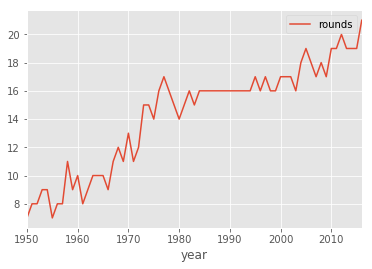

In [24]:
races_during_the_season = driver_standings[['round', 'year']][driver_standings.year < 2017] \
    .sort_values('round', ascending=False) \
    .drop_duplicates(subset=['year'])

races_during_the_season = races_during_the_season.rename(columns={'round': 'rounds'}).sort_values('year')

races_during_the_season.plot(x='year', y='rounds');

Действительно, на графике видно, что по количеству гонок в сезоне чемпионат можно условно разделить на 3 этапа:
<ol>
    <li>с 50-го по 70-ый год
    <li>с 70-го по 00-ый год
    <li>с 00-го по настоящее время
</ol>
Что вполне коррелирует с ранее полученными данными и позволяет сделать вполне очевидный вывод, что при увеличении количества гонок в чемпионате среднее количество побед на один чемпионский титул будет увеличиваться. 

### А теперь проверим как победа в первой гонке сезона влияет на судьбу чемпионского титула

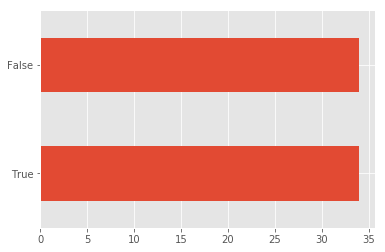

In [25]:
race_winners = results[
    (results['round'] == 1) & (results['position'] == 1) & (results.year < 2017)
][['driver', 'year']].rename(columns={'driver': 'winner'})

race_winners = champions.merge(race_winners, on='year', how='inner')
race_winners['is_champion'] = race_winners['driver'] == race_winners['winner']
race_winners.is_champion.value_counts().plot(kind='barh');

Как видно, успешное начало чемпионата вовсе не гарантирует его успешное завершение. А если гонщик начал сезон с 2-х побед подряд? Проверим:

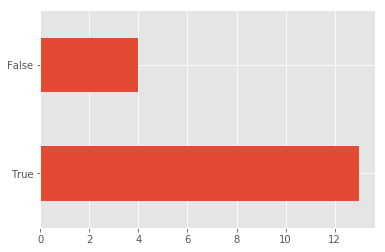

In [26]:
race_winners_group = results[
    (results['round'] <= 2) & (results['position'] == 1) & (results.year < 2017)
].groupby('year')['driver'].unique()

race_winners_group = race_winners_group[race_winners_group.apply(lambda x: len(x) == 1)]
race_winners_years = race_winners_group.keys().tolist()

race_winners = results[
    (results['round'] == 1) & (results['position'] == 1) & (results.year.isin(race_winners_years))
][['driver', 'year']].rename(columns={'driver': 'winner'})

race_winners = champions.merge(race_winners, on='year', how='inner')
race_winners['is_champion'] = race_winners['driver'] == race_winners['winner']
race_winners.is_champion.value_counts().plot(kind='barh');

Как видно, для 2-х побед подряд, шансы на титул повышаются более чем в 3 раза. Посмотрим, что будет после 3-х побед подряд:

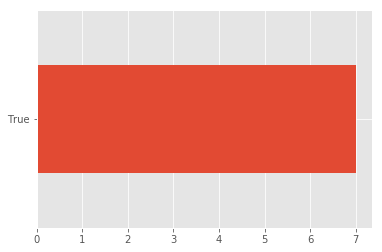

In [27]:
race_winners_group = results[
    (results['round'] <= 3) & (results['position'] == 1) & (results.year < 2017)
].groupby('year')['driver'].unique()

race_winners_group = race_winners_group[race_winners_group.apply(lambda x: len(x) == 1)]
race_winners_years = race_winners_group.keys().tolist()

race_winners = results[
    (results['round'] == 1) & (results['position'] == 1) & (results.year.isin(race_winners_years))
][['driver', 'year']].rename(columns={'driver': 'winner'})

race_winners = champions.merge(race_winners, on='year', how='inner')
race_winners['is_champion'] = race_winners['driver'] == race_winners['winner']
race_winners.is_champion.value_counts().plot(kind='barh');

"Чаша Грааля", наконец, найдена! Если гонщик одержал 3 победы подряд на старте, то можно смело идти и ставить все имеющиеся в наличии деньги на его победу в чемпионате :)

### Раз уж пошла речь о графиках, то посмотрим как менялся средний возраст участников чемпионата

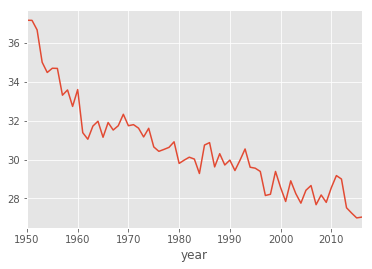

In [28]:
drivers_during_the_season = driver_standings[['round', 'year', 'driver', 'driverRef']][driver_standings.year < 2017] \
    .drop_duplicates(subset=['year', 'driverRef'])
drivers_during_the_season = drivers_during_the_season.merge(drivers, on='driverRef', how='inner')[
    ['year', 'driver', 'driverRef', 'dob', 'nationality']
]

drivers_during_the_season = drivers_during_the_season[drivers_during_the_season.dob.notnull()]

drivers_during_the_season['dob'] = drivers_during_the_season['dob'].apply(lambda x: int(x.split('-')[0]))
drivers_during_the_season['age'] = drivers_during_the_season['year'] - drivers_during_the_season['dob']

drivers_during_the_season.groupby('year')['age'].mean().plot();

На графике видна отчетливая тенденция к снижению среднего возраста гонщиков чемпионата, при этом наблюдаются определенные всплески, которые увеличивают средний возраст, но это можно легко объяснить тем, в эти сезоны не дебютировали молодые гонщики, а действующие "повзрослели" на 1 год.

### Теперь интересно проверить, настоколько сильно возраст чемпионов расходится со средним возрастом участников чемпионата

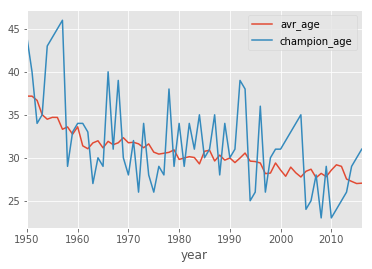

In [29]:
champions_data = champions.merge(drivers, on='driverRef', how='inner')[
    ['year', 'driver', 'driverRef', 'dob']
]

champions_data['dob'] = champions_data['dob'].apply(lambda x: int(x.split('-')[0]))
champions_data['age'] = champions_data['year'] - champions_data['dob']

champions_data = champions_data.rename(columns={'age': 'champion_age'})[['year', 'champion_age']]

drivers_and_champions_age = pd.merge(drivers_during_the_season, champions_data, on='year', how='inner')
    
drivers_and_champions_age['avr_age'] = drivers_and_champions_age.groupby('year')['age'].transform('mean')
drivers_and_champions_age.sort_values('year').plot(x='year', y=['avr_age', 'champion_age']);

Как видно, преимущественно в чемпионате побеждают более опытные гонщики, хотя время от времени появляются молодые таланты, которые не признают авторитетов.

### Ну и на последок посмотрим как менялся мультинациональный состав чемпионата

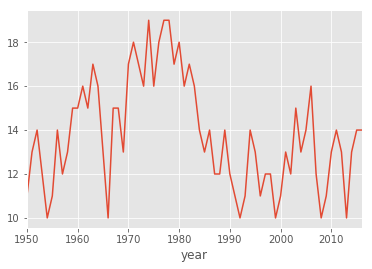

In [30]:
drivers_during_the_season \
    .sort_values('year') \
    .drop_duplicates(subset=['year', 'nationality']) \
    .groupby(['year'])['year'] \
    .agg('count') \
    .plot();

На удивление, наиболее мультинациональный состав участников чемпионата приходится на 70-е - 80-е годы. Возможно это связанно с тем, что в те времена чемпионат был более демократичный и стоимость участия была относительно не высока. Но при этом он уже начал привлекать к себе достаточно большое медийное внимание.

## С гонщиками разобрались, пора обратить внимание на технику

### Посмотрим насколько менялась скорость болидов за последние 20 лет

Для наиболее репрезентативного сравнения возьмем результаты квалификации и трассу, конфигурация которой не менялась все эти годы - Альберт Парк в Австралии. Здесь есть один ньюанс, который надо учитывать: с 1997 по 2004 год квалификация состояла из одной сессии, в 2005 из 2-х, с 2006 по настоящее время из 3-х. Будем брать время последней сессии как наиболее актуальное для целей исследования.

In [31]:
def lap_time_to_sec(t):
    if t:
        t = t.replace('.', ':')
        m, s, ms = [float(i) for i in t.split(':')]
        return (m * 60) + s + (ms / 1000)
    return t

In [32]:
def filter_slow_results(df, d, key='time'):
    idx = 0
    while idx < len(df):
        prev_time = df.iloc[idx - 1][key]
        cur_time = df.iloc[idx][key]
        diff_time = prev_time - cur_time
        if diff_time > d or diff_time < -d:
            df = df.drop(df.index[idx])
            idx += 1
        idx += 1
    return df

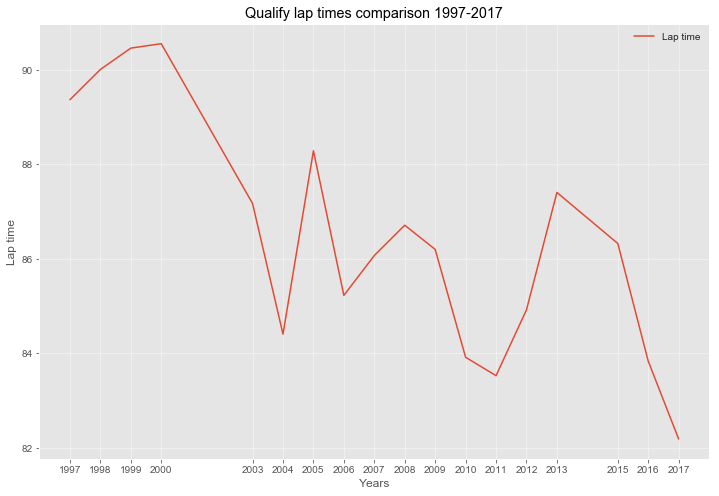

In [33]:
qual_winners = qual_results[(qual_results.circuit == 'Albert Park Grand Prix Circuit') & (qual_results.position == 1)]

qual_winners_97_04 = qual_winners[
    (qual_winners.year > 1996)
    & (qual_winners.year < 2005)
][['year', 'q1']].rename(columns={'q1': 'time'})

qual_winners_05 = qual_winners[qual_winners.year == 2005][['year', 'q2']].rename(columns={'q2': 'time'})

qual_winners_06_17 = qual_winners[qual_winners.year > 2005][['year', 'q3']].rename(columns={'q3': 'time'})

qual_winners_97_17 = pd.merge(
    pd.merge(
        qual_winners_97_04, qual_winners_05, how='outer'
    ), qual_winners_06_17, how='outer'
).sort_values('year').reset_index(drop=True)

qual_winners_97_17['time'] = qual_winners_97_17['time'].apply(lap_time_to_sec)

# Исключим из результатов явно дождевые квалификации, где разница с предыдущим годом составляет более 10 секунд
qual_winners_97_17 = filter_slow_results(qual_winners_97_17, 10.0)

fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(1,1,1)
major_ticks = qual_winners_97_17.as_matrix(columns=['year']).flatten()                                                                                           
ax.set_xticks(major_ticks)                                                                                                 
ax.grid(which='both')                                                                                                                                      
ax.grid(which='major', alpha=0.5)

plt.style.use('seaborn-white')
plt.title('Qualify lap times comparison 1997-2017')
plt.xlabel('Years')
plt.ylabel('Lap time')
plt.plot(qual_winners_97_17['year'], qual_winners_97_17['time'], label='Lap time')
plt.legend(loc='best')
plt.show();

Как видно, график сопровождается определенными всплесками и падениями, которые легко объяснить изменениями технического регламента, которые в большинстве своем (кроме 2017 года) были призванны замедлить рост скоростей. Но судя по графику, эти изменения носили кратковременный характер и вскоре скорости болидов выходили на прежний уровень и превосходили его.

### Ну а теперь, зная когда примерно менялся технических регламент, проверим предположение о том, что каждая смена регламента ведет к увеличению разрыва между командами

Для чистоты эксперимента будем брать 5 лучших и 5 худших квалификационных результата из первой 10-ки, чтобы исключить влиянияе явных команд аутсайдеров. И если с лучшими результатами все просто, то для худших надо задать определенные ограничения: 
<ul>
    <li>Исключить все результаты без времени</li>
    <li>Исключить результаты с отстованием более 5 секунд от предыдущего как нерепрезентативные</li>
</ul>
Трассу оставим ту же и временной период также возьмем в 20 лет.

### Для начала посчитаем среднее время лидеров 

In [34]:
qual_ap_results = qual_results[qual_results.circuit == 'Albert Park Grand Prix Circuit'] \
    .sort_values(['year', 'position']) \
    .reset_index(drop=True)

qual_best_5_results = qual_ap_results[qual_ap_results.position.isin([1, 2, 3, 4, 5])]

qual_best_5_results_97_04 = qual_best_5_results[
    (qual_best_5_results.year > 1996)
    & (qual_best_5_results.year < 2005)
][['year', 'position', 'q1']].rename(columns={'q1': 'time'})

qual_best_5_results_05 = qual_best_5_results[
    qual_best_5_results.year == 2005
][['year', 'position', 'q2']].rename(columns={'q2': 'time'})

qual_best_5_results_06_17 = qual_best_5_results[
    qual_best_5_results.year > 2005
][['year', 'position', 'q3']].rename(columns={'q3': 'time'})

qual_best_5_results_97_17 = pd.merge(
    pd.merge(
        qual_best_5_results_97_04, qual_best_5_results_05, how='outer'
    ), qual_best_5_results_06_17, how='outer'
).sort_values('year').reset_index(drop=True)

qual_best_5_results_97_17['time'] = qual_best_5_results_97_17['time'].apply(lap_time_to_sec)

qual_best_5_results_97_17['avr_best_time'] = qual_best_5_results_97_17.groupby('year')['time'].transform('mean')

qual_best_mean_results_97_17 = qual_best_5_results_97_17[['year', 'avr_best_time']].drop_duplicates()

qual_best_mean_results_97_17 = filter_slow_results(qual_best_mean_results_97_17, 10.0, key='avr_best_time')

qual_best_mean_results_97_17

,year,avr_best_time
0,1997,91.0752
5,1998,90.6266
10,1999,91.5226
15,2000,91.0004
20,2003,87.8508
25,2004,84.9170
30,2005,88.8962
35,2006,85.6880
40,2007,86.6446
45,2008,87.0152


### Теперь посчитаем среднее время аутсайдеров

In [35]:
qual_worst_results_97_04 = qual_ap_results[
    (qual_ap_results.year > 1996)
    & (qual_ap_results.year < 2005)
    & (qual_ap_results.position < 11)
][['year', 'position', 'q1']].dropna().rename(columns={'q1': 'time'})

qual_worst_results_97_04['time'] = qual_worst_results_97_04['time'].apply(lap_time_to_sec)
qual_worst_results_97_04 = filter_slow_results(qual_worst_results_97_04, 5.0)

qual_worst_results_05 = qual_ap_results[
    (qual_ap_results.year == 2005) & (qual_ap_results.position < 11)
][['year', 'position', 'q2']].dropna().rename(columns={'q2': 'time'})

qual_worst_results_05['time'] = qual_worst_results_05['time'].apply(lap_time_to_sec)
qual_worst_results_05 = filter_slow_results(qual_worst_results_05, 5.0)

qual_worst_results_06_17 = qual_ap_results[
    qual_ap_results.year > 2005
][['year', 'position', 'q3']].dropna().rename(columns={'q3': 'time'})

qual_worst_results_06_17['time'] = qual_worst_results_06_17['time'].apply(lap_time_to_sec)
qual_worst_results_06_17 = filter_slow_results(qual_worst_results_06_17, 5.0)

qual_worst_5_results_97_04 = qual_worst_results_97_04[
    qual_worst_results_97_04.position.isin(qual_worst_results_97_04.position[-5:])
]

qual_worst_5_results_05 = qual_worst_results_05[
    qual_worst_results_05.position.isin(qual_worst_results_05.position[-5:])
]

qual_worst_5_results_06_17 = qual_worst_results_06_17[
    qual_worst_results_06_17.position.isin(qual_worst_results_06_17.position[-5:])
]

qual_worst_5_results_97_17 = pd.merge(
    pd.merge(
        qual_worst_5_results_97_04, qual_worst_5_results_05, how='outer'
    ), qual_worst_5_results_06_17, how='outer'
).sort_values('year').reset_index(drop=True)

qual_worst_5_results_97_17['avr_worst_time'] = qual_worst_5_results_97_17.groupby('year')['time'].transform('mean')

qual_worst_mean_results_97_17 = qual_worst_5_results_97_17[['year', 'avr_worst_time']].drop_duplicates()

qual_worst_mean_results_97_17 = filter_slow_results(qual_worst_mean_results_97_17, 10.0, key='avr_worst_time')

qual_worst_mean_results_97_17

,year,avr_worst_time
0,1997,92.51260
5,1998,91.93760
10,1999,92.60080
15,2000,91.79920
20,2003,88.66480
25,2004,86.03360
30,2005,89.98020
35,2006,87.26860
40,2007,88.00220
45,2008,88.61680


### Теперь можно объединить результаты и построить графики

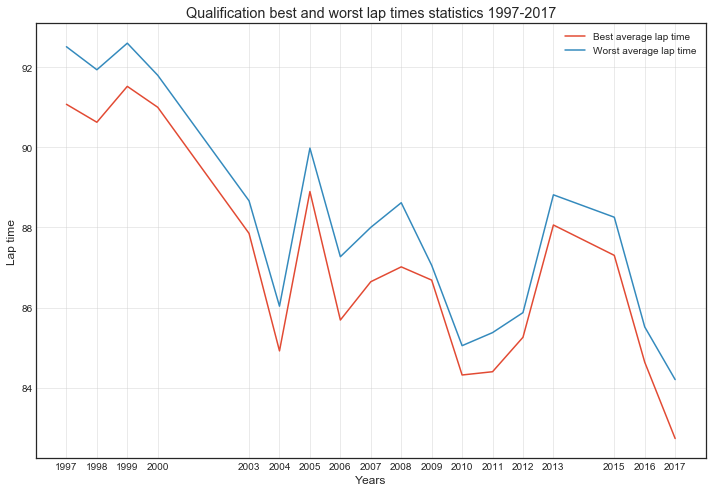

In [36]:
qual_mean_results_97_17 = qual_best_mean_results_97_17.merge(
    qual_worst_mean_results_97_17, on='year', how='inner'
)

fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(1,1,1)
major_ticks = qual_mean_results_97_17.as_matrix(columns=['year']).flatten()                                                                                           
ax.set_xticks(major_ticks)                                                                                                 
ax.grid(which='both')                                                                                                                                      
ax.grid(which='major', alpha=0.5)

plt.style.use('seaborn-white')
plt.title('Qualification best and worst lap times statistics 1997-2017')
plt.xlabel('Years')
plt.ylabel('Lap time')
plt.plot(
    qual_mean_results_97_17['year'],
    qual_mean_results_97_17['avr_best_time'],
    label='Best average lap time'
)
plt.plot(
    qual_mean_results_97_17['year'],
    qual_mean_results_97_17['avr_worst_time'],
    label='Worst average lap time'
)
plt.legend(loc='best');
plt.show();

Как видно из графика, если изменение технического регламента и влияет на разрыв между командами, то скорее в сторону уменьшения, судя по 2009 году. Поэтому можно сказать, что утверждение: "каждая смена регламента ведет к увеличению разрыва между командами, а стабильный регламент сокращению разыва", как минимум - спорно. Но для большей наглядности соединим все графики вместе:

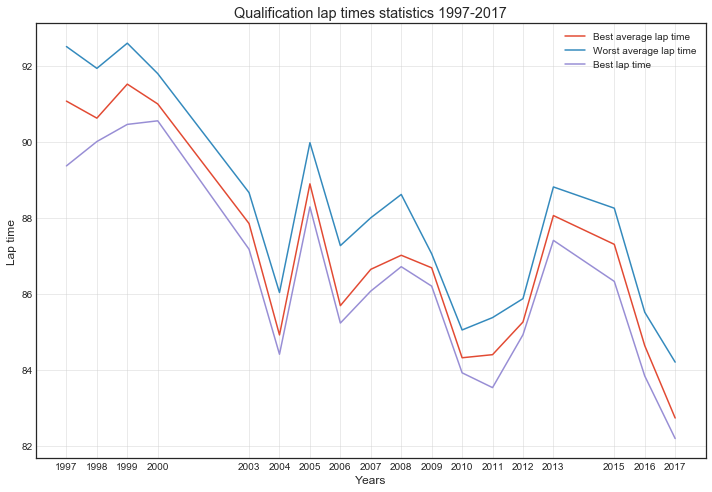

In [37]:
qual_total_results_97_17 = qual_mean_results_97_17.merge(qual_winners_97_17, on='year', how='inner')

fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(1,1,1)
major_ticks = qual_total_results_97_17.as_matrix(columns=['year']).flatten()                                                                                           
ax.set_xticks(major_ticks)                                                                                                 
ax.grid(which='both')                                                                                                                                      
ax.grid(which='major', alpha=0.5)

plt.style.use('seaborn-white')
plt.title('Qualification lap times statistics 1997-2017')
plt.xlabel('Years')
plt.ylabel('Lap time')
plt.plot(
    qual_total_results_97_17['year'],
    qual_total_results_97_17['avr_best_time'],
    label='Best average lap time'
)
plt.plot(
    qual_total_results_97_17['year'],
    qual_total_results_97_17['avr_worst_time'],
    label='Worst average lap time'
)
plt.plot(
    qual_total_results_97_17['year'],
    qual_total_results_97_17['time'],
    label='Best lap time'
)
plt.legend(loc='best');
plt.show();

Подводя итог, можно сказать, что величена разрыва между лучшим, лучшим средним и худшим средним временем не слишком сильно влияет на качество борьбы в чемпионате. Для этого достаточно сравнить 2009 год, где чемпион определился досрочно и 2012 где в последней гонке сезона на чемпионский титул претендовало сразу 4 гонщика.